In [11]:
from functools import partial # 기능?
import scipy as sp
# 부등식 제한조건이 있는 최적화 문제 계산
def f2(x):
    return np.sqrt((x[0] - 4) ** 2 + (x[1] - 2) ** 2)

# 제한 조건 상수

k = 10

def ieq_constraint2(x, k):
    return np.atleast_1d(k - np.sum(np.abs(x)))

sp.optimize.fmin_slsqp(f2, np.array([0, 0]), ieqcons=[partial(ieq_constraint2, k=k)])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.04176407312663e-07
            Iterations: 13
            Function evaluations: 69
            Gradient evaluations: 13


array([3.99999992, 1.9999996 ])

In [16]:
# 집합
#set([1, [1]]) # 에러! 셋 자료형은 이뮤터블 형태의 원소만 가진다
set([1, (1)])

{1}

In [19]:
A1 = {1, 2, 3, 4, 5}
A2 = {5, 6, 7, 8}
A1.union(A2)

{1, 2, 3, 4, 5, 6, 7, 8}

In [20]:
A1 | A2

{1, 2, 3, 4, 5, 6, 7, 8}

In [22]:
A1.intersection(A2)

{5}

In [23]:
A1 & A2

{5}

In [24]:
A2.issubset(A1)

False

In [25]:
A2 <= A1

False

In [44]:
A1 = frozenset([])
A2 = frozenset(["HH"])
A3 = frozenset(["HT"])
A4 = frozenset(["TH"])
#...

In [46]:
from itertools import chain, combinations
omega = {"HH", "HT", "TH", "TT"}
def get_set_of_subjects(omega):
    return set([frozenset(s)
                for s in chain.from_iterable(combinations(omega, r)
                                           for r in range(len(omega) + 1))])
get_set_of_subjects(omega)
# omega 집합을 받아서 부분집합을 구하고 이를 받아서 프로즌셋 자료형 객체로 만듦
# 이 부분집합들을 원소로 가지는 하나의 set 객체로

{frozenset(),
 frozenset({'HH'}),
 frozenset({'HH', 'HT'}),
 frozenset({'TH'}),
 frozenset({'TH', 'TT'}),
 frozenset({'HH', 'TT'}),
 frozenset({'HH', 'TH'}),
 frozenset({'HT'}),
 frozenset({'HH', 'HT', 'TH'}),
 frozenset({'TT'}),
 frozenset({'HT', 'TT'}),
 frozenset({'HH', 'TH', 'TT'}),
 frozenset({'HT', 'TH'}),
 frozenset({'HT', 'TH', 'TT'}),
 frozenset({'HH', 'HT', 'TT'}),
 frozenset({'HH', 'HT', 'TH', 'TT'})}

In [55]:
# 이럴 때 확률이라고 말할 수 있다, 확률 분포 
{frozenset() : 0,
 frozenset({'HH'}) : 0.25,
 frozenset({'HH', 'HT'}) : 0.5,
 frozenset({'TH'}) : 0.25,
 frozenset({'TH', 'TT'}) : 0.5,
 frozenset({'HH', 'TT'}) : 0.5,
 frozenset({'HH', 'TH'}) : 0.5,
 frozenset({'HT'}) : 0.25,
 frozenset({'HH', 'HT', 'TH'}) : 0.75,
 frozenset({'TT'}) : 0.25,
 frozenset({'HT', 'TT'}) : 0.5,
 frozenset({'HH', 'TH', 'TT'}) : 0.75,
 frozenset({'HT', 'TH'}) : 0.5,
 frozenset({'HT', 'TH', 'TT'}) : 0.75,
 frozenset({'HH', 'HT', 'TT'}) : 0.75,
 frozenset({'HH', 'HT', 'TH', 'TT'}) : 1
}

{frozenset(): 0,
 frozenset({'HH'}): 0.25,
 frozenset({'HH', 'HT'}): 0.5,
 frozenset({'TH'}): 0.25,
 frozenset({'TH', 'TT'}): 0.5,
 frozenset({'HH', 'TT'}): 0.5,
 frozenset({'HH', 'TH'}): 0.5,
 frozenset({'HT'}): 0.25,
 frozenset({'HH', 'HT', 'TH'}): 0.75,
 frozenset({'TT'}): 0.25,
 frozenset({'HT', 'TT'}): 0.5,
 frozenset({'HH', 'TH', 'TT'}): 0.75,
 frozenset({'HT', 'TH'}): 0.5,
 frozenset({'HT', 'TH', 'TT'}): 0.75,
 frozenset({'HH', 'HT', 'TT'}): 0.75,
 frozenset({'HH', 'HT', 'TH', 'TT'}): 1}

In [79]:
# 연습문제 6.4.3
# 0도에서 180도 사이에 화살이 2배 더 잘 박히도록 조작된 원반
def f(a, b):
    if a > b:
        raise ValueError('a must be less than b or equal to b')
    if (a <= 180) & (b <= 180):
        result = ((b - a) / 180) * (2 / 3)
    elif (a <= 180) & (b > 180):
        result = ((180 - a) / 180) * (2 / 3) + ((b - 180) / 180) * (1 / 3)        
    else:
        result = ((b - a) / 180) * (1 / 3)
    return result

# 혹은 람다 함수 이용해
# f = lambda  a, b: (2 * (b - a) if b < 180 else b - 2 * a + 180 if a < 180 else b - a) / 540
#f(0, 270)

In [85]:
f(90, 360)

0.6666666666666666

In [108]:
# 연습문제 6.4.4
def F(x):
    if x < 0:
        return 0
    elif x > 360:
        return 1
    else:
        return (x * 2 if x < 180 else (x - 180) + 360) / 540
F(360) - F(90)

0.6666666666666667

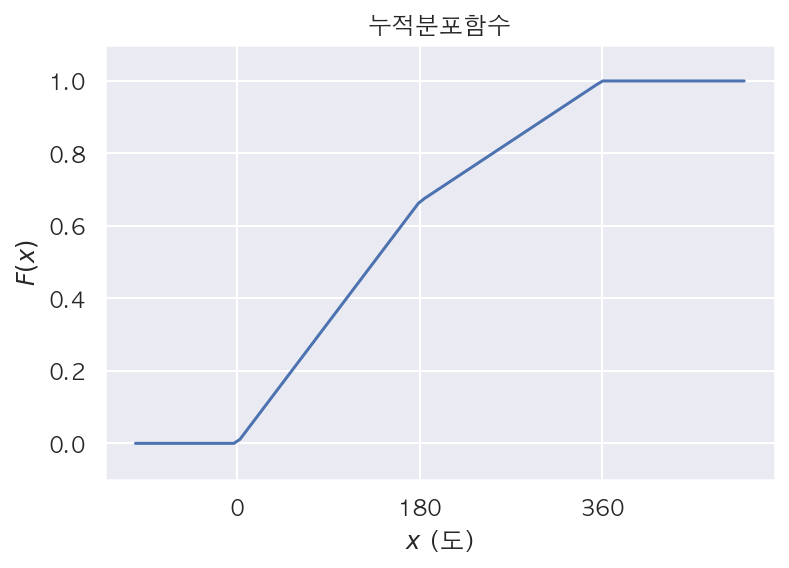

In [110]:
# 그래프 그리기
t = np.linspace(-100, 500, 100)
Fs = np.array(list(map(F, t))) # t 리스트 데이터를 F함수에 적용한 리스트 행렬
plt.plot(t, Fs)
plt.ylim(-0.1, 1.1)
plt.xticks([0, 180, 360])
plt.title('누적분포함수')
plt.xlabel('$x$ (도)')
plt.ylabel('$F(x)$')
plt.show()